In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import warnings
import numpy as np
import requests
from io import StringIO

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [19]:
# Define the base path and URLs as per your config file
BASE_CDN_PATH = "https://bigdatabowl2023.nyc3.cdn.digitaloceanspaces.com"
TRACKING_DATA_URL_TEMPLATE = BASE_CDN_PATH + "/raw/tracking_data/tracking_week_{week}.csv"
PLAYS_URL = BASE_CDN_PATH + "/raw/plays.csv"
PLAYERS_URL = BASE_CDN_PATH + "/raw/players.csv"
COLORS_URL = BASE_CDN_PATH + "/raw/colors.csv"
TACKLES_URL = BASE_CDN_PATH + "/raw/tackles.csv"

# Replace 'week' with the actual week number you want to download
week_number = 1
TRACKING_DATA_URL = TRACKING_DATA_URL_TEMPLATE.format(week=week_number)

# Define a function to download and return a DataFrame
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Assuming the data is in CSV format
        return pd.read_csv(StringIO(response.text))
    else:
        print(f"Failed to download data from {url}")
        return None


# Download the data
tracking_data = download_data(TRACKING_DATA_URL)
plays_data = download_data(PLAYS_URL)
players_data = download_data(PLAYERS_URL)
colors_data = download_data(COLORS_URL)
tackles_data = download_data(TACKLES_URL)

# Now you can analyze the DataFrames and decide which columns to keep



# Merging the datasets can be done once you've determined the key columns
# For example, if you decide to merge tracking_data and plays_data on a 'play_id' column
# merged_data = pd.merge(tracking_data, plays_data, on='play_id')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
dtypes: float

In [20]:
# Example of analysis: Display the first few rows of each DataFrame
print(tracking_data.info())
print(plays_data.info())
print(players_data.info())
print(colors_data.info())
print(tackles_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
dtypes: float

In [104]:

# Already loaded week 1 data
df = pd.read_csv('/Users/nick/nfl-big-data-bowl-2024/data/final_pso_pipeline_results_week_1.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Loop through weeks 2 to 9
for week in range(2, 10):
    # Construct file path for the current week
    file_path = f'/Users/nick/nfl-big-data-bowl-2024/data/final_pso_pipeline_results_week_{week}.csv'
    
    # Read the data
    week_df = pd.read_csv(file_path)
    
    # Remove any unnamed columns
    week_df = week_df.loc[:, ~week_df.columns.str.contains('^Unnamed')]
    
    # Append to the original DataFrame
    df = pd.concat([df, week_df], ignore_index=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47552 entries, 0 to 47551
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nflId                47552 non-null  float64
 1   frechet_distance     47552 non-null  float64
 2   play_id              47552 non-null  int64  
 3   game_id              47552 non-null  int64  
 4   week_num             47552 non-null  int64  
 5   displayName          47552 non-null  object 
 6   position             47552 non-null  object 
 7   gameId               47552 non-null  int64  
 8   playId               47552 non-null  int64  
 9   passResult           24393 non-null  object 
 10  expectedPointsAdded  47547 non-null  float64
 11  defensiveTeam        47552 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 4.4+ MB


In [106]:

# Merge the DataFrames on 'playId' and 'nflId'
merged_df = pd.merge(df, tackles_data, left_on=['playId', 'nflId','gameId'], right_on=['playId', 'nflId','gameId'], how='left')


In [107]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47552 entries, 0 to 47551
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nflId                47552 non-null  float64
 1   frechet_distance     47552 non-null  float64
 2   play_id              47552 non-null  int64  
 3   game_id              47552 non-null  int64  
 4   week_num             47552 non-null  int64  
 5   displayName          47552 non-null  object 
 6   position             47552 non-null  object 
 7   gameId               47552 non-null  int64  
 8   playId               47552 non-null  int64  
 9   passResult           24393 non-null  object 
 10  expectedPointsAdded  47547 non-null  float64
 11  defensiveTeam        47552 non-null  object 
 12  tackle               6393 non-null   float64
 13  assist               6393 non-null   float64
 14  forcedFumble         6393 non-null   float64
 15  pff_missedTackle     6393 non-null  

In [108]:
# Replace NaN in 'passResult' with 'R' (for run plays)
df['passResult'].fillna('R', inplace=True)

# Step 2: Check for Duplicates
# Ensure no duplicates based on game, play, and nflId
if df.duplicated(subset=['game_id', 'play_id', 'nflId']).any():
    print("There are duplicates based on game, play, and nflId.")
    # Optional: Remove duplicates
    df = df.drop_duplicates(subset=['game', 'play', 'nflId'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47552 entries, 0 to 47551
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nflId                47552 non-null  float64
 1   frechet_distance     47552 non-null  float64
 2   play_id              47552 non-null  int64  
 3   game_id              47552 non-null  int64  
 4   week_num             47552 non-null  int64  
 5   displayName          47552 non-null  object 
 6   position             47552 non-null  object 
 7   gameId               47552 non-null  int64  
 8   playId               47552 non-null  int64  
 9   passResult           47552 non-null  object 
 10  expectedPointsAdded  47547 non-null  float64
 11  defensiveTeam        47552 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 4.4+ MB


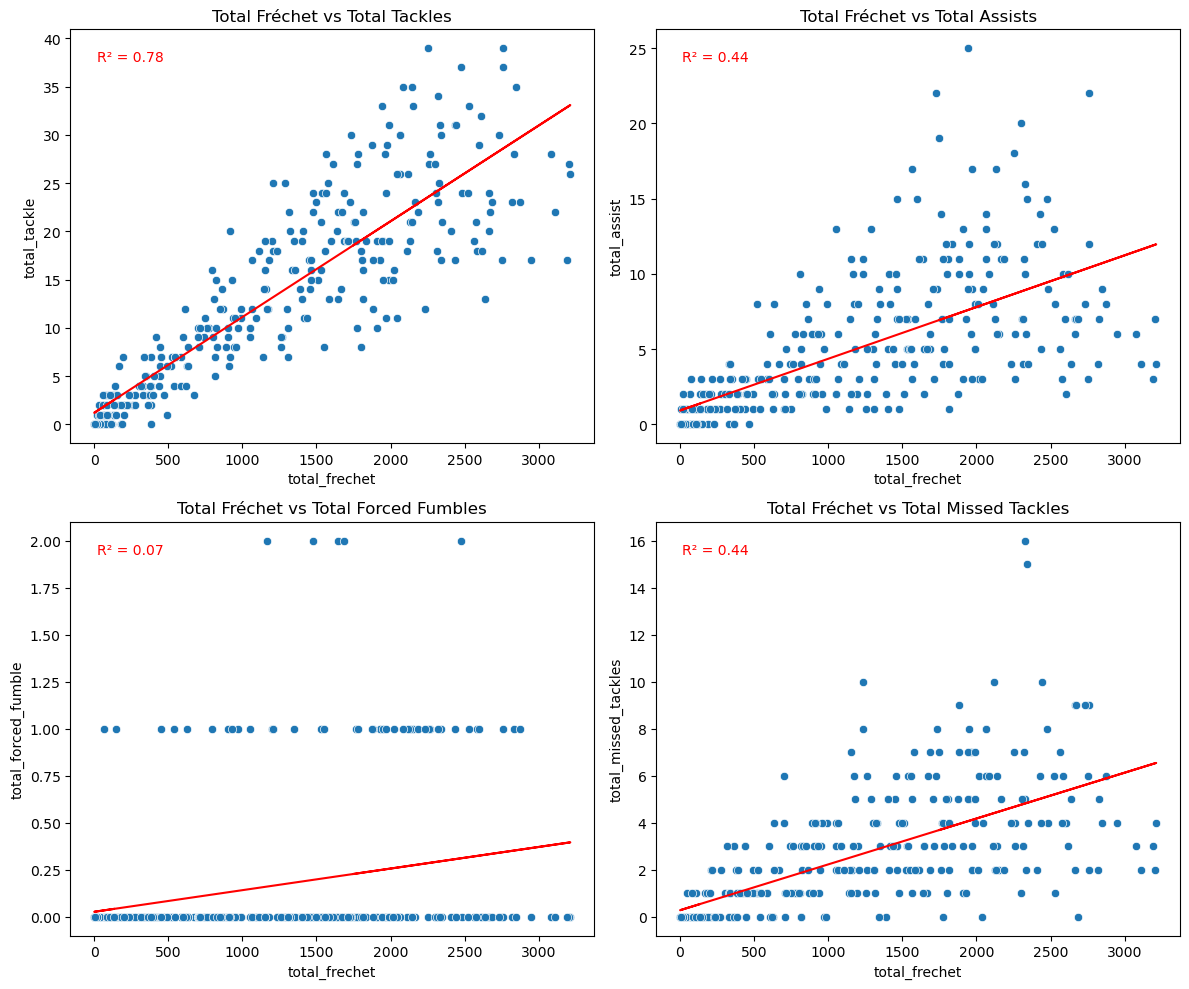

In [114]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

df = merged_df
# Fill NaN values with zeros for tackle-related columns
tackle_cols = ['tackle', 'assist', 'forcedFumble', 'pff_missedTackle']
df[tackle_cols] = df[tackle_cols].fillna(0)

# Aggregate at the player level
player_level_data = df.groupby(['nflId', 'displayName']).agg(
    total_frechet=('frechet_distance', 'sum'),
    total_tackle=('tackle', 'sum'),
    total_assist=('assist', 'sum'),
    total_forced_fumble=('forcedFumble', 'sum'),
    total_missed_tackles=('pff_missedTackle', 'sum'),
).reset_index()

# Define a function to create scatter plots with trend lines
def create_scatter_plot(x, y, data, ax, title):
    sns.scatterplot(x=x, y=y, data=data, ax=ax)
    ax.set_title(title)
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    ax.plot(data[x], intercept + slope*data[x], color='red')  # Trend line
    ax.text(0.05, 0.95, f'R\u00b2 = {r_value**2:.2f}', transform=ax.transAxes,
            color='red', verticalalignment='top')

# Create scatter plots for player-level data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
create_scatter_plot('total_frechet', 'total_tackle', player_level_data, axs[0, 0], 'Total Fréchet vs Total Tackles')
create_scatter_plot('total_frechet', 'total_assist', player_level_data, axs[0, 1], 'Total Fréchet vs Total Assists')
create_scatter_plot('total_frechet', 'total_forced_fumble', player_level_data, axs[1, 0], 'Total Fréchet vs Total Forced Fumbles')
create_scatter_plot('total_frechet', 'total_missed_tackles', player_level_data, axs[1, 1], 'Total Fréchet vs Total Missed Tackles')
plt.tight_layout()
plt.show()

# Aggregate at the team level for both pass and run plays
team_level_data = df.groupby(['defensiveTeam', 'passResult']).agg(
    avg_frechet_per_play=('frechet_distance', lambda x: x.sum() / x.count()),
    total_tackle=('tackle', 'sum'),
    total_assist=('assist', 'sum'),
    total_forced_fumble=('forcedFumble', 'sum'),
    total_missed_tackles=('pff_missedTackle', 'sum'),
).reset_index()

# Create scatter plots for team-level data
# Repeat the scatter plot process for team_level_data


In [111]:
# Fill NaN values with zeros for tackle-related columns
tackle_cols = ['tackle', 'assist', 'forcedFumble', 'pff_missedTackle']
df[tackle_cols] = df[tackle_cols].fillna(0)

In [112]:
# Aggregate at the team level
team_level_agg = df.groupby('defensiveTeam').agg(
    sum_frechet=('frechet_distance', 'sum'),
    avg_frechet=('frechet_distance', 'mean'),
    sum_tackle=('tackle', 'sum'),
    avg_tackle=('tackle', 'mean'),
    sum_assist=('assist', 'sum'),
    avg_assist=('assist', 'mean'),
    sum_forced_fumble=('forcedFumble', 'sum'),
    avg_forced_fumble=('forcedFumble', 'mean'),
    sum_missed_tackles=('pff_missedTackle', 'sum'),
    avg_missed_tackles=('pff_missedTackle', 'mean')
).reset_index()


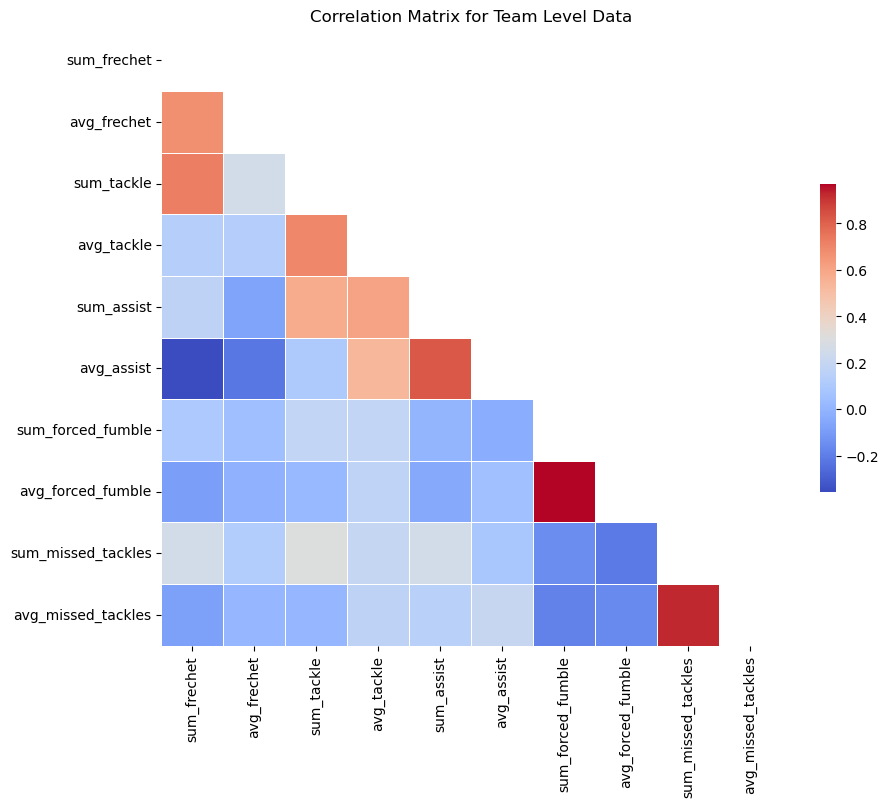

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix_team = team_level_agg.select_dtypes(include=[np.number]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_team, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_team, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Team Level Data')
plt.show()


In [38]:
player_level_agg.head()

,nflId,displayName,sum_frechet,avg_frechet,min_frechet,max_frechet,sum_tackle,avg_tackle,min_tackle,max_tackle,...,min_assist,max_assist,sum_forced_fumble,avg_forced_fumble,min_forced_fumble,max_forced_fumble,sum_missed_tackles,avg_missed_tackles,min_missed_tackles,max_missed_tackles
0,35459.0,Kareem Jackson,1310.063041,5.874722,0.507131,26.969945,14.0,0.062780,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,6.0,0.026906,0.0,1.0
1,35466.0,Devin McCourty,1498.723772,6.812381,0.440799,39.051715,20.0,0.090909,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.004545,0.0,1.0
2,37078.0,Patrick Peterson,2081.966660,8.007564,0.915367,34.088493,17.0,0.065385,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.003846,0.0,1.0
3,37724.0,Chris Harris,283.181328,7.452140,0.230436,33.089834,4.0,0.105263,0.0,1.0,...,0.0,1.0,1.0,0.026316,0.0,1.0,0.0,0.000000,0.0,0.0
4,38540.0,Stephon Gilmore,2475.481798,9.669851,0.557702,47.248903,21.0,0.082031,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,2.0,0.007812,0.0,1.0


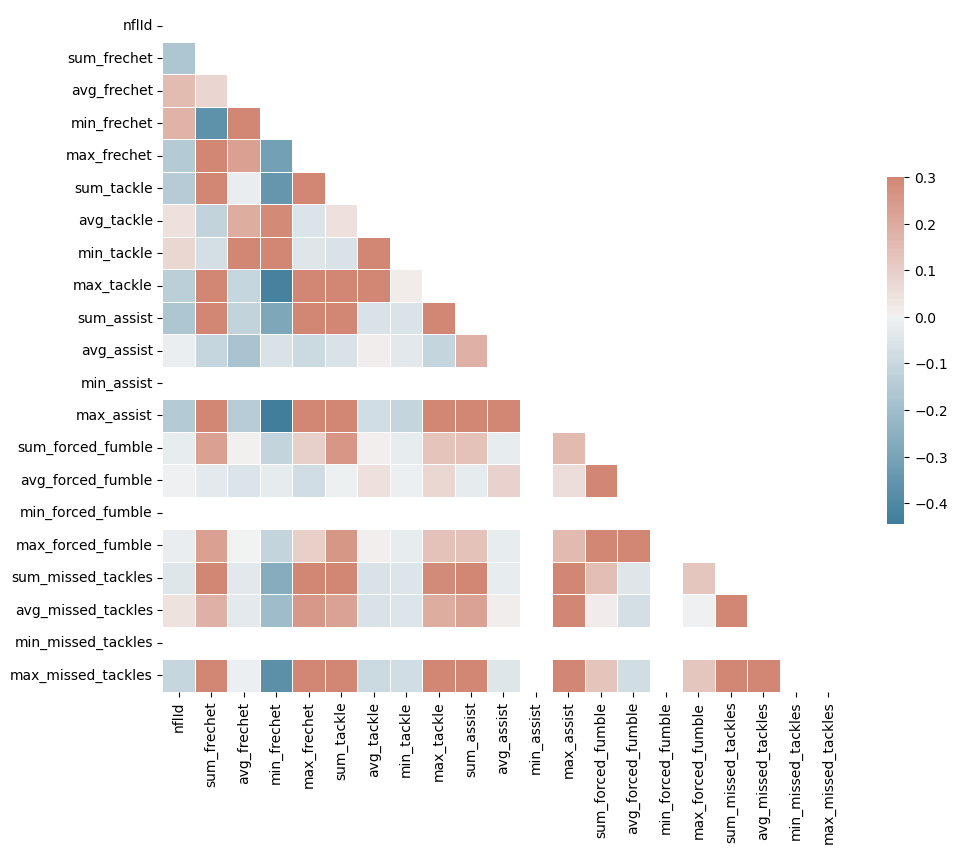

In [35]:
# Assuming player_level_agg is the DataFrame after aggregation
# Select only numeric columns for the correlation matrix
numeric_cols = player_level_agg.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix for numeric columns only
corr_matrix = player_level_agg[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [33]:
# Aggregate at the player level
player_level_agg = merged_df.groupby(['nflId', 'displayName']).agg(
    sum_frechet=('frechet_distance', 'sum'),
    avg_frechet=('frechet_distance', 'mean'),
    min_frechet=('frechet_distance', 'min'),
    max_frechet=('frechet_distance', 'max'),
    sum_tackle=('tackle', 'sum'),
    avg_tackle=('tackle', 'mean'),
    min_tackle=('tackle', 'min'),
    max_tackle=('tackle', 'max'),
    # Repeat for assist, forcedFumble, and pff_missedTackle
    sum_assist=('assist', 'sum'),
    avg_assist=('assist', 'mean'),
    min_assist=('assist', 'min'),
    max_assist=('assist', 'max'),
    sum_forced_fumble=('forcedFumble', 'sum'),
    avg_forced_fumble=('forcedFumble', 'mean'),
    min_forced_fumble=('forcedFumble', 'min'),
    max_forced_fumble=('forcedFumble', 'max'),
    sum_missed_tackles=('pff_missedTackle', 'sum'),
    avg_missed_tackles=('pff_missedTackle', 'mean'),
    min_missed_tackles=('pff_missedTackle', 'min'),
    max_missed_tackles=('pff_missedTackle', 'max'),
).reset_index()


In [41]:
corr_matrix_team

,sum_frechet,avg_frechet,sum_tackle,avg_tackle,sum_assist,avg_assist,sum_forced_fumble,avg_forced_fumble,sum_missed_tackles,avg_missed_tackles
sum_frechet,1.000000,0.616802,0.693556,-0.005468,0.376885,-0.163067,0.123001,-0.068904,0.269803,-0.096960
avg_frechet,0.616802,1.000000,0.171892,0.085632,-0.008715,-0.112254,0.061865,-0.006468,0.024148,-0.033166
sum_tackle,0.693556,0.171892,1.000000,0.591296,0.609294,0.163226,0.139588,-0.023433,0.251829,-0.062828
avg_tackle,-0.005468,0.085632,0.591296,1.000000,0.336756,0.420531,0.089383,0.088737,-0.001243,0.055044
sum_assist,0.376885,-0.008715,0.609294,0.336756,1.000000,0.799302,-0.008117,-0.092012,0.469021,0.284466
avg_assist,-0.163067,-0.112254,0.163226,0.420531,0.799302,1.000000,-0.054958,-0.010567,0.304821,0.393320
sum_forced_fumble,0.123001,0.061865,0.139588,0.089383,-0.008117,-0.054958,1.000000,0.970246,0.060388,0.017789
avg_forced_fumble,-0.068904,-0.006468,-0.023433,0.088737,-0.092012,-0.010567,0.970246,1.000000,-0.013879,0.035523
sum_missed_tackles,0.269803,0.024148,0.251829,-0.001243,0.469021,0.304821,0.060388,-0.013879,1.000000,0.898338
avg_missed_tackles,-0.096960,-0.033166,-0.062828,0.055044,0.284466,0.393320,0.017789,0.035523,0.898338,1.000000


In [37]:
merged_df.head()

,nflId,frechet_distance,play_id,game_id,week_num,displayName,position,gameId,playId,passResult,expectedPointsAdded,defensiveTeam,tackle,assist,forcedFumble,pff_missedTackle
0,42816.0,5.856237,56,2022090800,1,Troy Hill,CB,2022090800,56,C,0.00442,LA,0.0,0.0,0.0,0.0
1,43294.0,2.647472,56,2022090800,1,Jalen Ramsey,CB,2022090800,56,C,0.00442,LA,1.0,0.0,0.0,0.0
2,47844.0,1.392515,56,2022090800,1,Taylor Rapp,FS,2022090800,56,C,0.00442,LA,0.0,0.0,0.0,0.0
3,48026.0,3.886480,56,2022090800,1,Nick Scott,SS,2022090800,56,C,0.00442,LA,0.0,0.0,0.0,0.0
4,52607.0,2.288872,56,2022090800,1,Jordan Fuller,SS,2022090800,56,C,0.00442,LA,0.0,0.0,0.0,0.0


In [43]:
corr_matrix 

,nflId,sum_frechet,avg_frechet,min_frechet,max_frechet,sum_tackle,avg_tackle,min_tackle,max_tackle,sum_assist,...,min_assist,max_assist,sum_forced_fumble,avg_forced_fumble,min_forced_fumble,max_forced_fumble,sum_missed_tackles,avg_missed_tackles,min_missed_tackles,max_missed_tackles
nflId,1.000000,-0.168562,0.153857,0.175621,-0.150537,-0.145410,0.052200,0.074421,-0.134937,-0.165356,...,NaN,-0.151816,-0.022201,-0.005979,NaN,-0.019382,-0.047543,0.044056,NaN,-0.106750
sum_frechet,-0.168562,1.000000,0.081571,-0.364774,0.640190,0.864715,-0.118165,-0.070327,0.404717,0.632103,...,NaN,0.547851,0.224711,-0.034317,NaN,0.226235,0.604327,0.186227,NaN,0.653123
avg_frechet,0.153857,0.081571,1.000000,0.630078,0.226381,-0.016990,0.195654,0.380754,-0.105802,-0.116914,...,NaN,-0.143960,0.003857,-0.051926,NaN,0.000404,-0.036622,-0.033959,NaN,-0.011221
min_frechet,0.175621,-0.364774,0.630078,1.000000,-0.310163,-0.347862,0.292743,0.515280,-0.428761,-0.287068,...,NaN,-0.444472,-0.112527,-0.028421,NaN,-0.113780,-0.264762,-0.205147,NaN,-0.373167
max_frechet,-0.150537,0.640190,0.226381,-0.310163,1.000000,0.573085,-0.054456,-0.044638,0.390511,0.428912,...,NaN,0.485256,0.094623,-0.080627,NaN,0.098866,0.371657,0.249491,NaN,0.542631
sum_tackle,-0.145410,0.864715,-0.016990,-0.347862,0.573085,1.000000,0.052547,-0.062741,0.422712,0.689006,...,NaN,0.538157,0.256622,-0.010844,NaN,0.255993,0.620357,0.222286,NaN,0.640626
avg_tackle,0.052200,-0.118165,0.195654,0.292743,-0.054456,0.052547,1.000000,0.648239,0.401374,-0.057757,...,NaN,-0.079131,0.006470,0.048012,NaN,0.006445,-0.058138,-0.062890,NaN,-0.095815
min_tackle,0.074421,-0.070327,0.380754,0.515280,-0.044638,-0.062741,0.648239,1.000000,0.019240,-0.055051,...,NaN,-0.108619,-0.021359,-0.012381,NaN,-0.022059,-0.050081,-0.050220,NaN,-0.078192
max_tackle,-0.134937,0.404717,-0.105802,-0.428761,0.390511,0.422712,0.401374,0.019240,1.000000,0.309277,...,NaN,0.455773,0.129451,0.075038,NaN,0.133694,0.289227,0.197663,NaN,0.408446
sum_assist,-0.165356,0.632103,-0.116914,-0.287068,0.428912,0.689006,-0.057757,-0.055051,0.309277,1.000000,...,NaN,0.506826,0.134374,-0.026147,NaN,0.132112,0.563560,0.222817,NaN,0.517251


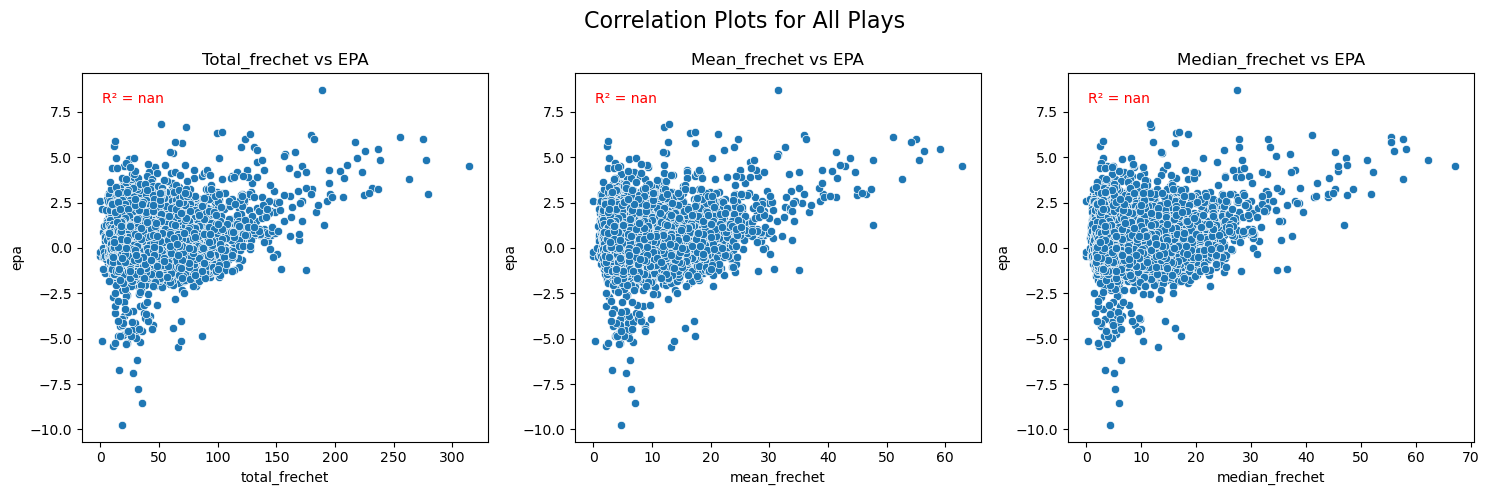

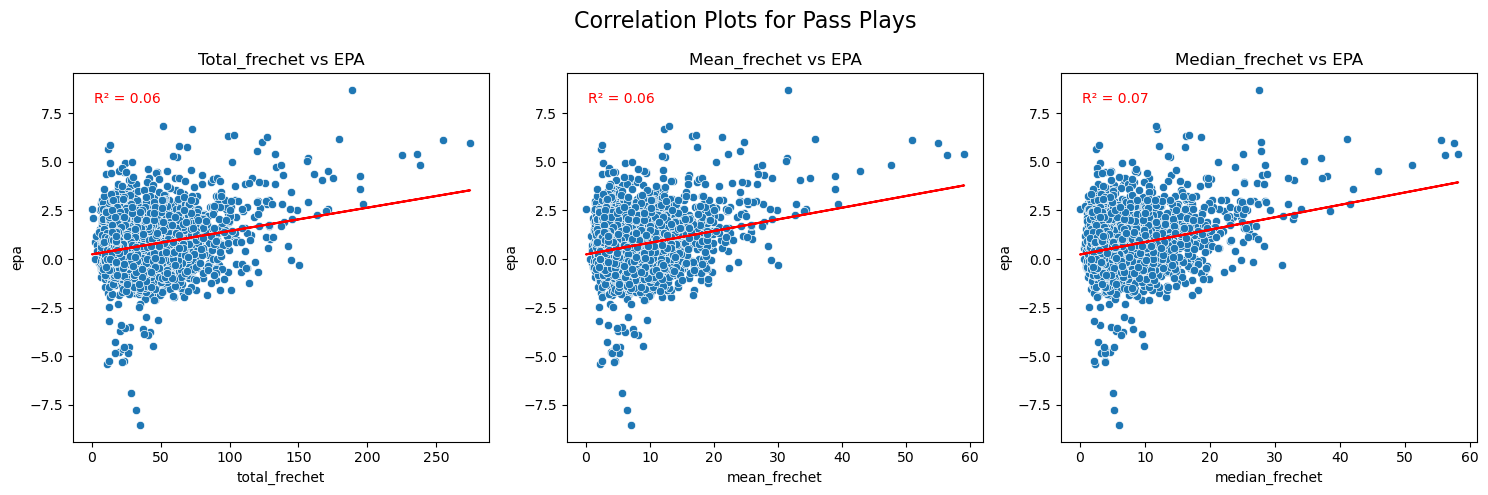

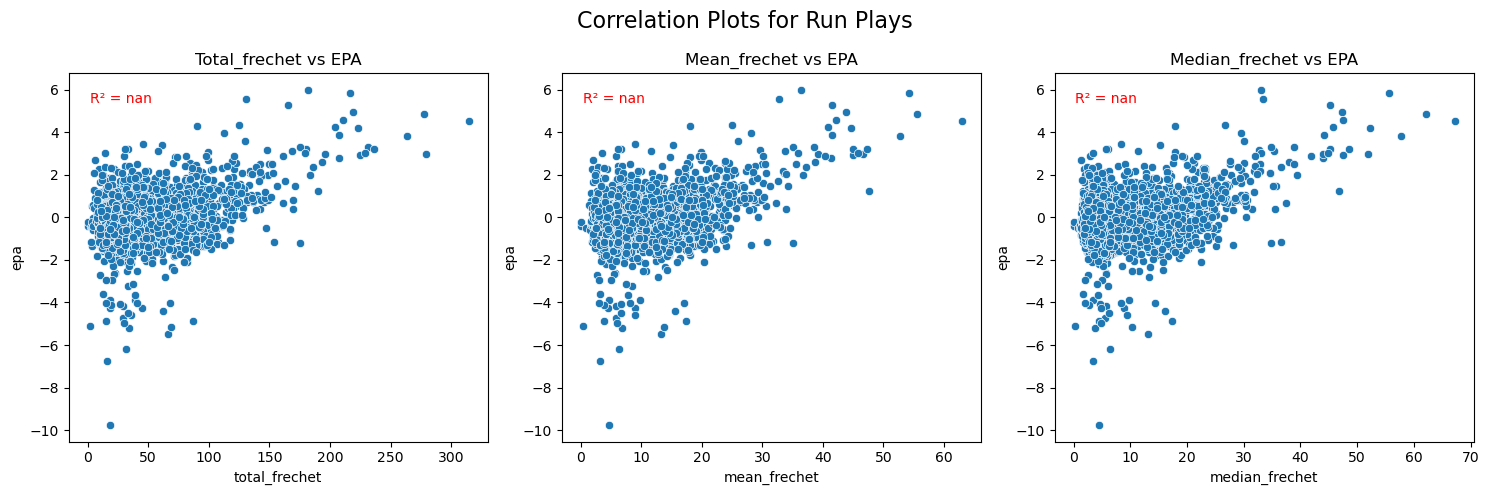

In [8]:
# Aggregate the Fréchet distance
play_level_data = df.groupby(['game_id', 'play_id']).agg(
    total_frechet=('frechet_distance', 'sum'),
    mean_frechet=('frechet_distance', 'mean'),
    median_frechet=('frechet_distance', 'median'),
    epa=('expectedPointsAdded', 'first'),
    passResult=('passResult', 'first')  # Include passResult for filtering
)

# Filter data for pass and run plays
pass_plays = play_level_data[play_level_data['passResult'] == 'C']
run_plays = play_level_data[play_level_data['passResult'] == 'R']

# Define a function to create a correlation plot with trend line
def create_corr_plot(data, play_type):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Correlation Plots for {play_type} Plays', fontsize=16)

    for i, col in enumerate(['total_frechet', 'mean_frechet', 'median_frechet']):
        sns.scatterplot(x=col, y='epa', data=data, ax=axs[i])
        axs[i].set_title(f'{col.capitalize()} vs EPA')

        # Linear regression and plotting the trend line
        slope, intercept, r_value, p_value, std_err = linregress(data[col], data['epa'])
        axs[i].plot(data[col], intercept + slope*data[col], color='red')
        axs[i].text(0.05, 0.95, f'R\u00b2 = {r_value**2:.2f}', transform=axs[i].transAxes, 
                    color='red', verticalalignment='top')
    
    fig.savefig(f'{play_type}_plays_correlation.png')
    plt.tight_layout()
    plt.show()

# Create plots for all plays, pass plays, and run plays
create_corr_plot(play_level_data, 'All')
create_corr_plot(pass_plays, 'Pass')
create_corr_plot(run_plays, 'Run')

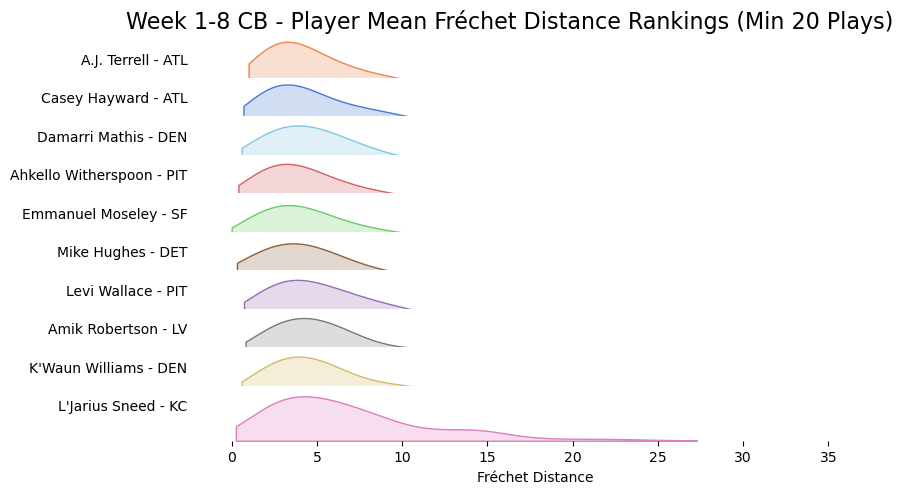

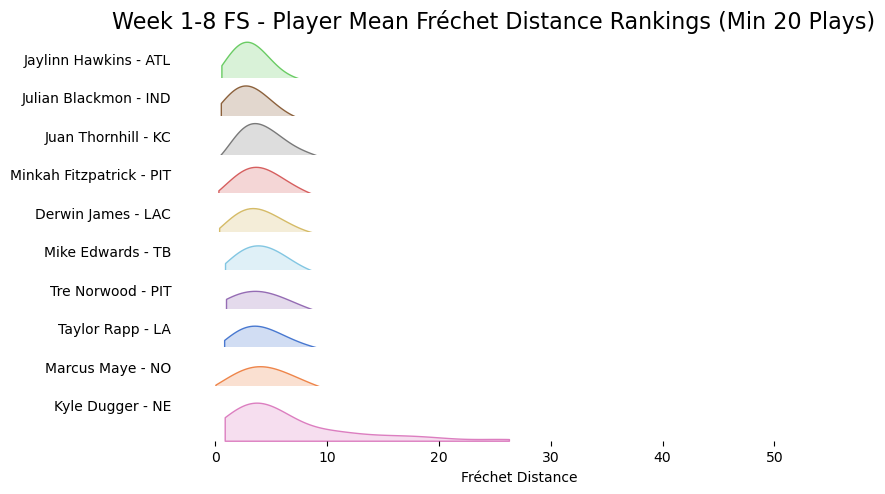

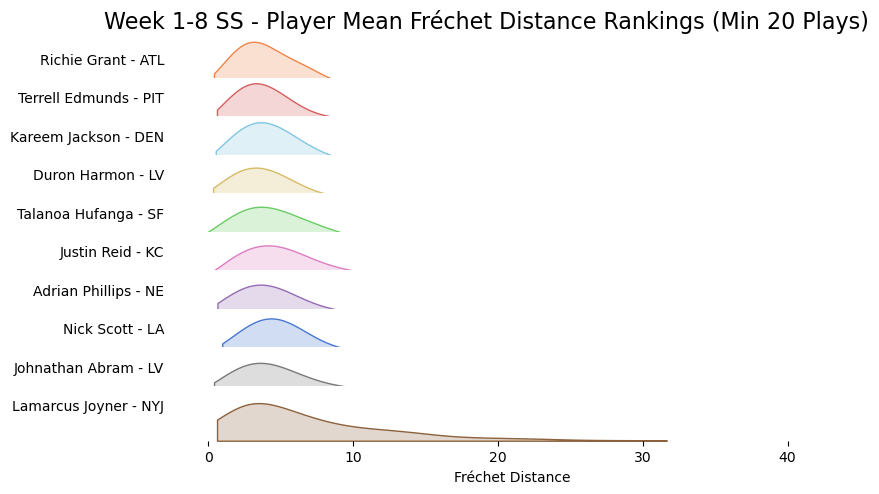

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate mean Fréchet distance, play count, and get the team at the player level
player_stats = df.groupby(['displayName', 'defensiveTeam', 'position'])['frechet_distance'].agg(['mean', 'count']).reset_index()

# Filter out players with fewer than 10 plays
player_stats_filtered = player_stats[player_stats['count'] >= 100]

# Get unique positions
positions = df['position'].unique()

# Loop through each position to create a separate ridge plot
for position in positions:
    # Filter the DataFrame for the current position
    df_position = df[df['position'] == position]

    # Find top players for the current position based on mean Fréchet distance
    top_players = player_stats_filtered[player_stats_filtered['position'] == position].sort_values(by='mean', ascending=True).head(10)
    
    # Create a label combining player's name and team
    top_players['label'] = top_players[['displayName', 'defensiveTeam']].agg(' - '.join, axis=1)

    # Merge the top players' labels back onto the position DataFrame
    df_position = df_position.merge(top_players[['displayName', 'label']], on='displayName', how='left')
    
    # Initialize the FacetGrid object
    g = sns.FacetGrid(df_position, row='label', hue='label', aspect=15, height=.5, palette="muted", row_order=top_players['label'].tolist())
    
    # Map the kdeplot onto the grid
    g.map(sns.kdeplot, 'frechet_distance', clip_on=True, fill=True, common_norm=False, bw_adjust=1, cut=0)

    # Remove 'Density' label and set player names as y-axis labels
    for ax, label in zip(g.axes.flatten(), top_players['label']):
        ax.set_ylabel(label, rotation=0, fontsize=10, labelpad=10)
        ax.yaxis.label.set_horizontalalignment('right')
    
    # Overlap the rows of the grid
    g.fig.subplots_adjust(hspace=-0.3)
    
    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.set_xlabels('Fréchet Distance')
    g.despine(bottom=True, left=True)
    # Add a title to the figure
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle(f'Week 1-8 {position} - Player Mean Fréchet Distance Rankings (Min 20 Plays)', fontsize=16)
    
    # Save the figure for each position
    plt.savefig(f'player_fechet_ridgeplot_week1_{position}.png')
    
    # Show the plot
    plt.show()


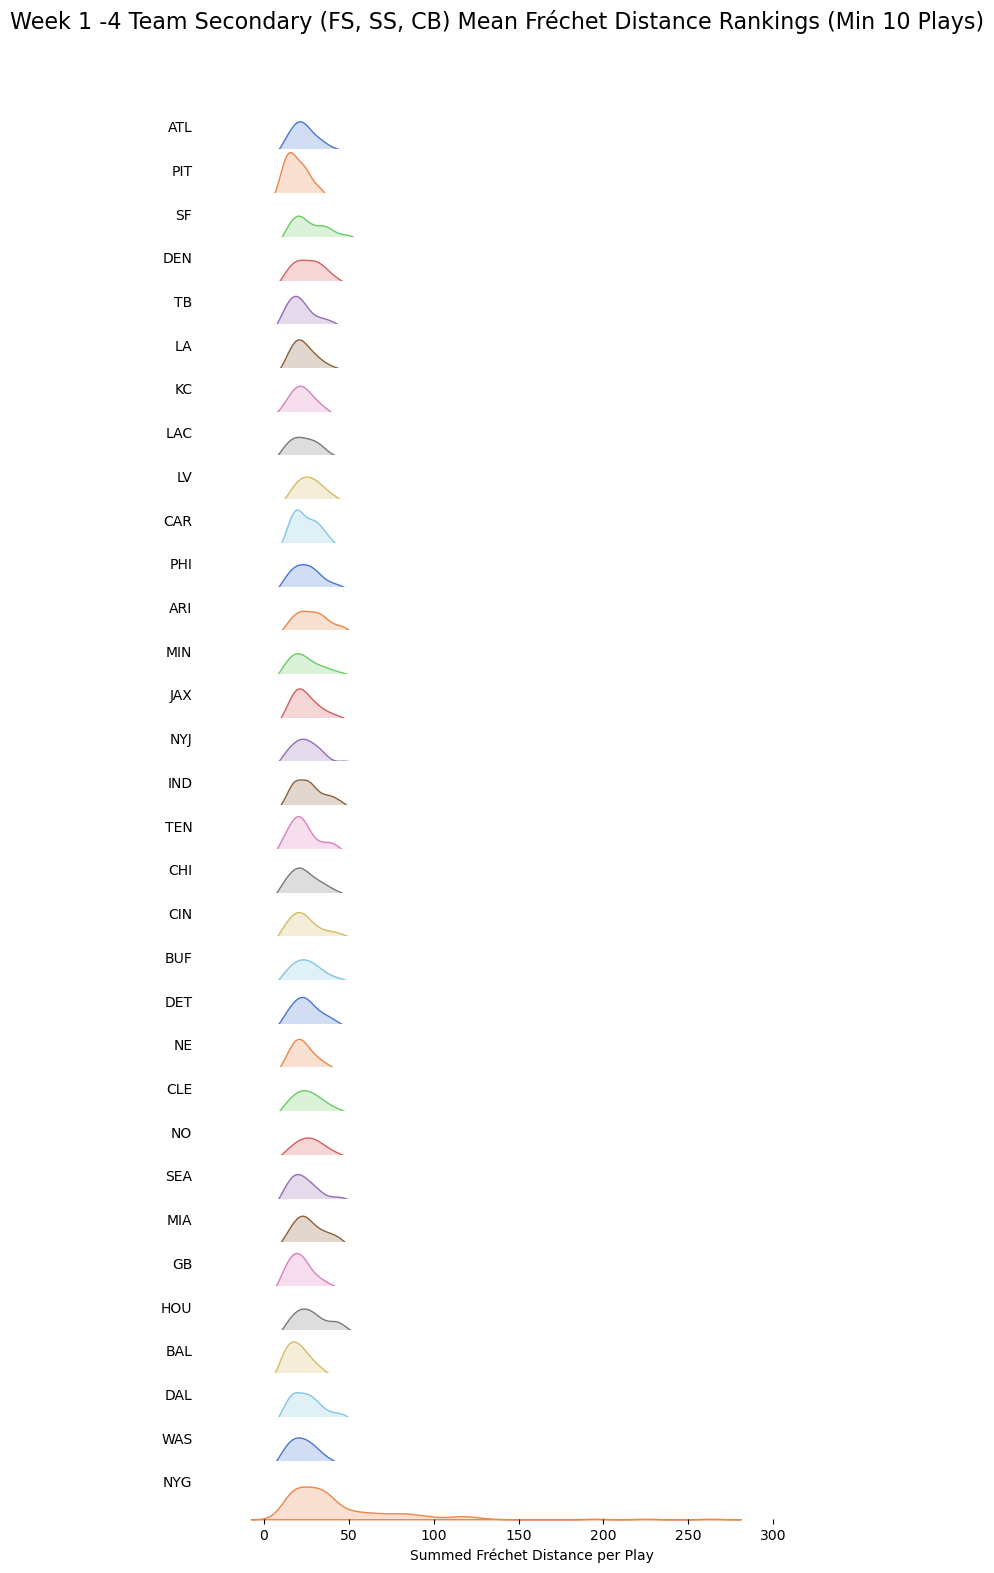

In [13]:
# Calculate sum of Fréchet distance per play at the team level
team_play_distance = df.groupby(['defensiveTeam', 'playId'])['frechet_distance'].sum().reset_index()

# Calculate mean Fréchet distance per play for each team
team_stats = team_play_distance.groupby('defensiveTeam')['frechet_distance'].agg(['mean', 'count']).reset_index()

# Filter out teams with fewer than a certain threshold of plays
min_plays_threshold = 10  # Define a threshold for minimum number of plays
team_stats_filtered = team_stats[team_stats['count'] >= min_plays_threshold]

# Rank the teams by average Fréchet distance
team_stats_filtered = team_stats_filtered.sort_values(by='mean', ascending=True)

# Select top N teams for visualization
top_teams = team_stats_filtered.head(32)  # Adjust N here as needed

# Merge the top teams' data back onto the original team_play_distance DataFrame
team_play_distance = team_play_distance.merge(top_teams[['defensiveTeam']], on='defensiveTeam', how='inner')

# Initialize the FacetGrid object with teams
g = sns.FacetGrid(team_play_distance, row='defensiveTeam', hue='defensiveTeam', aspect=15, height=.5, palette="muted")

# Map the kdeplot onto the grid
g.map(sns.kdeplot, 'frechet_distance', clip_on=False, fill=True, common_norm=False, bw_adjust=0.5)

# Remove 'Density' label and set team names as y-axis labels
for ax, label in zip(g.axes.flatten(), top_teams['defensiveTeam']):
    ax.set_ylabel(label, rotation=0, fontsize=10, labelpad=10)
    ax.yaxis.label.set_horizontalalignment('right')

# Overlap the rows of the grid
g.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.set_xlabels('Summed Fréchet Distance per Play')
g.despine(bottom=True, left=True)

# Add a title to the figure
plt.subplots_adjust(top=0.92)
g.fig.suptitle(f'Week 1 -4 Team Secondary (FS, SS, CB) Mean Fréchet Distance Rankings (Min {min_plays_threshold} Plays)', fontsize=16)
plt.savefig(f'team_secondary_rankings.png')

# Show the plot
plt.show()


In [72]:
# Assuming df is your primary DataFrame and additional_data contains 'yardsToGo' and 'playResult'
playfrechet_df = df.merge(plays_data[['gameId', 'playId', 'yardsToGo', 'prePenaltyPlayResult']], on=['gameId', 'playId'], how='left')


In [73]:
playfrechet_df

,nflId,frechet_distance,play_id,game_id,week_num,displayName,position,gameId,playId,passResult,expectedPointsAdded,defensiveTeam,tackle,assist,forcedFumble,pff_missedTackle,yardsToGo,prePenaltyPlayResult
0,42816.0,5.856237,56,2022090800,1,Troy Hill,CB,2022090800,56,C,0.004420,LA,0.0,0.0,0.0,0.0,10,6
1,43294.0,2.647472,56,2022090800,1,Jalen Ramsey,CB,2022090800,56,C,0.004420,LA,1.0,0.0,0.0,0.0,10,6
2,47844.0,1.392515,56,2022090800,1,Taylor Rapp,FS,2022090800,56,C,0.004420,LA,0.0,0.0,0.0,0.0,10,6
3,48026.0,3.886480,56,2022090800,1,Nick Scott,SS,2022090800,56,C,0.004420,LA,0.0,0.0,0.0,0.0,10,6
4,52607.0,2.288872,56,2022090800,1,Jordan Fuller,SS,2022090800,56,C,0.004420,LA,0.0,0.0,0.0,0.0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36759,52991.0,2.001651,3670,2022102400,7,Myles Bryant,CB,2022102400,3670,R,-0.506540,NE,0.0,1.0,0.0,0.0,5,2
36760,43522.0,1.707135,3698,2022102400,7,Jalen Mills,CB,2022102400,3698,R,-1.155537,NE,0.0,0.0,0.0,0.0,3,1
36761,43700.0,7.559202,3698,2022102400,7,Jonathan Jones,CB,2022102400,3698,R,-1.155537,NE,0.0,0.0,0.0,0.0,3,1
36762,44837.0,3.815307,3698,2022102400,7,Jabrill Peppers,SS,2022102400,3698,R,-1.155537,NE,0.0,0.0,0.0,0.0,3,1


In [93]:
# Summing Fréchet distance for each play
play_level_frechet = playfrechet_df.groupby(['game_id', 'play_id', 'defensiveTeam']).agg(
    play_frechet=('frechet_distance', 'sum'),
    prePenaltyPlayResult=('prePenaltyPlayResult', 'first')

).reset_index()

# Aggregate data at the team level
team_agg = play_level_frechet.groupby('defensiveTeam').agg(
   avg_frechet_per_play=('play_frechet', 'sum'),
    avg_play_result_per_play=('prePenaltyPlayResult', 'sum'),
).reset_index()


In [94]:
# Merge the aggregated data with the team colors data
final_data = team_agg.merge(colors_data, left_on='defensiveTeam', right_on='team_abbr')


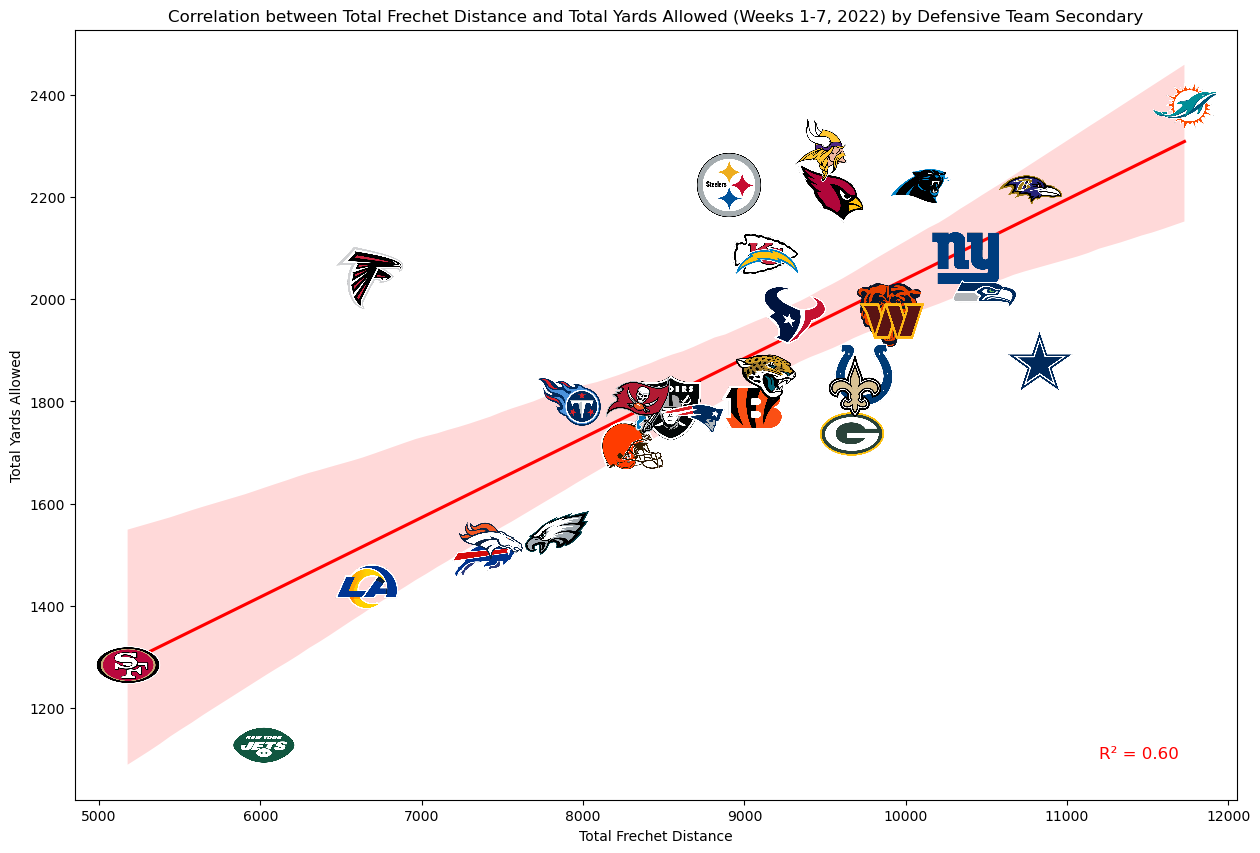

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage
from scipy.stats import linregress

# Calculate R² value
slope, intercept, r_value, p_value, std_err = linregress(final_data['avg_frechet_per_play'], final_data['avg_play_result_per_play'])


# Create the scatter plot with a regression line
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='avg_frechet_per_play', y='avg_play_result_per_play', data=final_data, ax=ax, scatter=False, color='red')

# Plot each team with its logo
for index, row in final_data.iterrows():
    # Load team logo from URL
    response = requests.get(row['team_logo_espn'])
    img = Image.open(BytesIO(response.content))

    # Convert image to a format suitable for matplotlib
    imagebox = OffsetImage(img, zoom=0.10)
    ab = AnnotationBbox(imagebox, (row['avg_frechet_per_play'], row['avg_play_result_per_play']), frameon=False)
    ax.add_artist(ab)

# Set labels and title
ax.set_xlabel('Total Frechet Distance')
ax.set_ylabel('Total Yards Allowed')
ax.set_title('Correlation between Total Frechet Distance and Total Yards Allowed (Weeks 1-7, 2022) by Defensive Team Secondary')
ax.text(0.95, 0.05, f'R\u00b2 = {r_value**2:.2f}', ha='right', va='bottom', transform=ax.transAxes, color='red', fontsize=12)

plt.show()



